                            OLS Regression Results                            
Dep. Variable:                GDP_USD   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.1851
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.674
Time:                        13:58:00   Log-Likelihood:                -467.04
No. Observations:                  16   AIC:                             938.1
Df Residuals:                      14   BIC:                             939.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.873e+11   7.06e+11      1.116      0.2

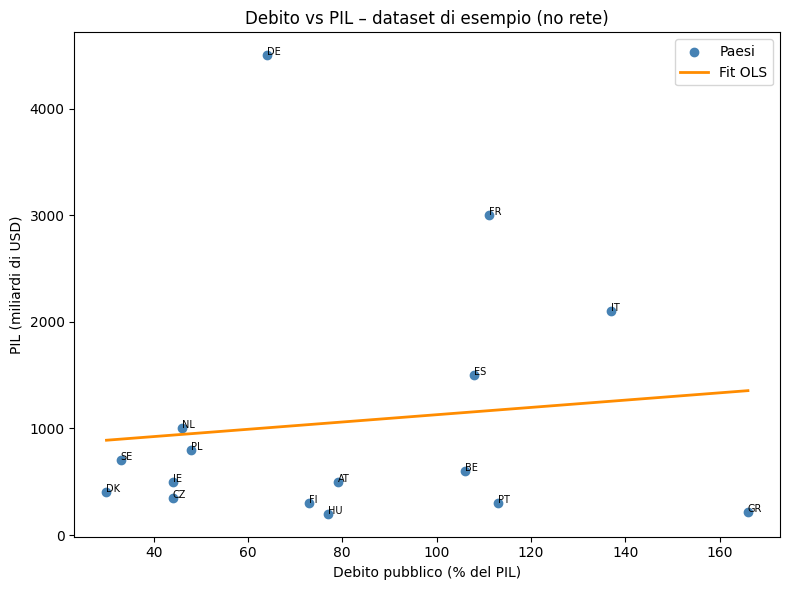

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# =========================
# 1) dati "finti" ma realistici
#    (numeri presi a spanne su ultimi anni)
# =========================
data = {
    "Country": [
        "IT",
        "DE",
        "FR",
        "ES",
        "NL",
        "SE",
        "PL",
        "BE",
        "AT",
        "PT",
        "GR",
        "IE",
        "FI",
        "CZ",
        "DK",
        "HU",
    ],
    "Debt_GDP": [137, 64, 111, 108, 46, 33, 48, 106, 79, 113, 166, 44, 73, 44, 30, 77],
    # PIL in miliardi USD (ordine di grandezza)
    "GDP_USD": [
        2100e9,
        4500e9,
        3000e9,
        1500e9,
        1000e9,
        700e9,
        800e9,
        600e9,
        500e9,
        300e9,
        220e9,
        500e9,
        300e9,
        350e9,
        400e9,
        200e9,
    ],
}

df = pd.DataFrame(data)

# =========================
# 2) regressione: PIL ~ debito
# =========================
X = sm.add_constant(df["Debt_GDP"])
y = df["GDP_USD"]
model = sm.OLS(y, X).fit()
print(model.summary())

# =========================
# 3) plot scatter + retta
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(df["Debt_GDP"], df["GDP_USD"] / 1e9, color="steelblue", label="Paesi")

# retta
x_line = pd.Series(sorted(df["Debt_GDP"]))
y_line = model.params["const"] + model.params["Debt_GDP"] * x_line
plt.plot(x_line, y_line / 1e9, color="darkorange", linewidth=2, label="Fit OLS")

plt.xlabel("Debito pubblico (% del PIL)")
plt.ylabel("PIL (miliardi di USD)")
plt.title("Debito vs PIL – dataset di esempio (no rete)")

# etichette
for _, row in df.iterrows():
    plt.text(row["Debt_GDP"], row["GDP_USD"] / 1e9, row["Country"], fontsize=7)

plt.legend()
plt.tight_layout()
plt.show()